<a href="https://colab.research.google.com/github/ylnrahma/FACE_2025/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DETEKSI WAJAH**

Nama : Yuliyana Rahmawati <br>
NIM  : 2141720241


1. Menginstal Dua Pustaka Python




In [1]:
!pip install opencv-python-headless geopy

2. Mengimpor Beberapa Pustaka Python

In [2]:
import cv2
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt

3. Menghubungkan Google Colab dengan Google Drive, sehingga file yang ada di Google Drive dapat diakses dan digunakan langsung dalam notebook Colab

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


4. Menampilkan semua dataset

Dataset berisi 8 gambar.
Contoh file gambar: ['/content/drive/MyDrive/DATASET/dataset1.jpg', '/content/drive/MyDrive/DATASET/dataset2.jpg', '/content/drive/MyDrive/DATASET/dataset3.jpg', '/content/drive/MyDrive/DATASET/dataset4.jpg', '/content/drive/MyDrive/DATASET/dataset5.jpg', '/content/drive/MyDrive/DATASET/dataset6.jpg', '/content/drive/MyDrive/DATASET/dataset7.jpg', '/content/drive/MyDrive/DATASET/dataset8.jpg']


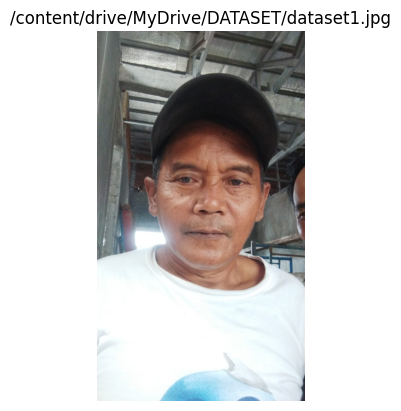

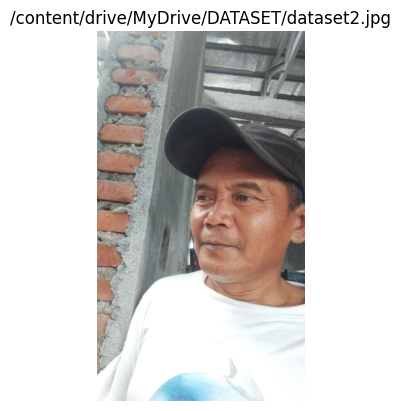

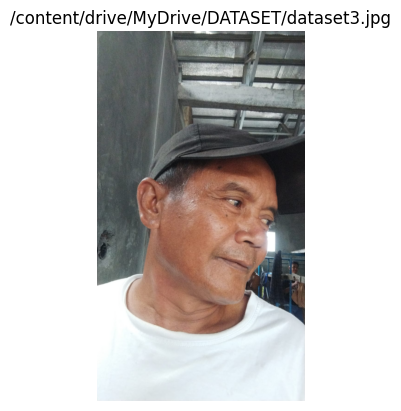

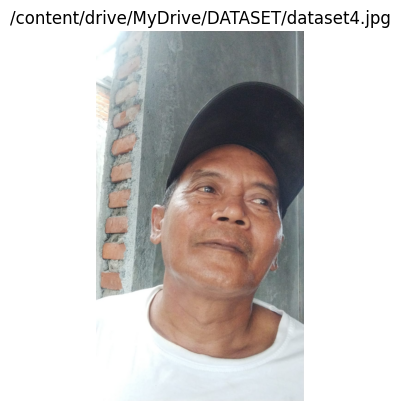

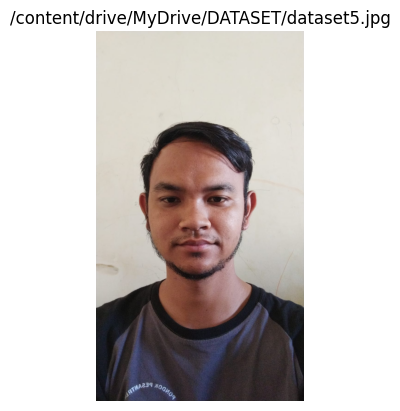

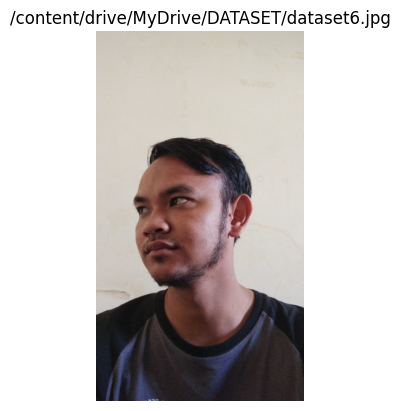

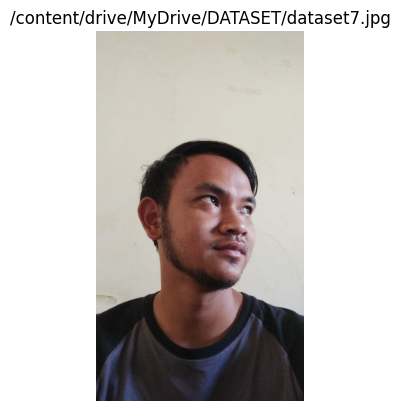

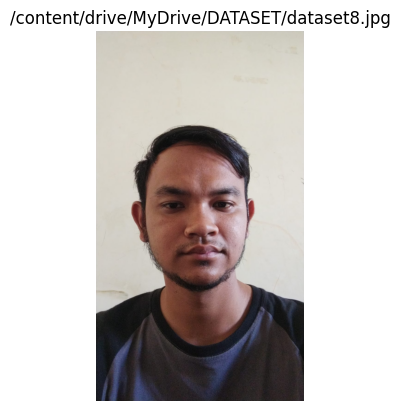

In [29]:
import os
import cv2
import matplotlib.pyplot as plt

# Path ke folder dataset di Google Drive
dataset_path = '/content/drive/MyDrive/DATASET'

# List semua file dalam folder dataset dengan ekstensi .jpg atau .png
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]

# Menampilkan jumlah gambar dalam dataset
print(f"Dataset berisi {len(image_files)} gambar.")

# Menampilkan contoh nama file gambar (otomatis menyesuaikan jumlah dataset)
print("Contoh file gambar:", image_files)

# Menampilkan semua gambar dalam dataset
for img_path in image_files:
    img = cv2.imread(img_path)  # Membaca gambar
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi warna BGR ke RGB
    plt.imshow(img_rgb)  # Menampilkan gambar
    plt.title(img_path)  # Menampilkan judul dengan path gambar
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()


5. Melakukan preprocessing gambar dengan dua langkah utama: resize dan grayscale untuk face recognition.

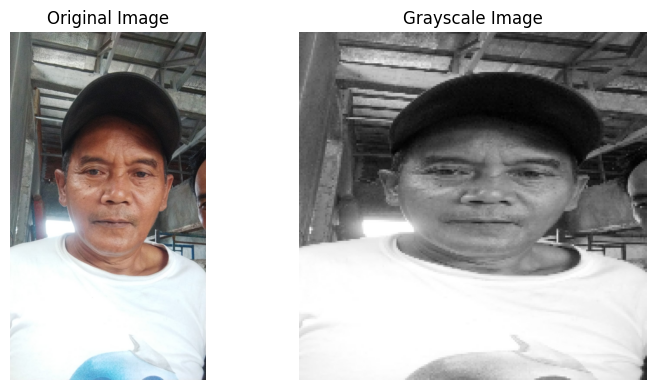

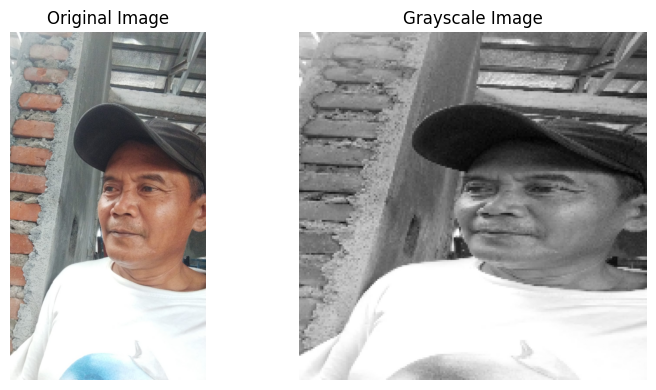

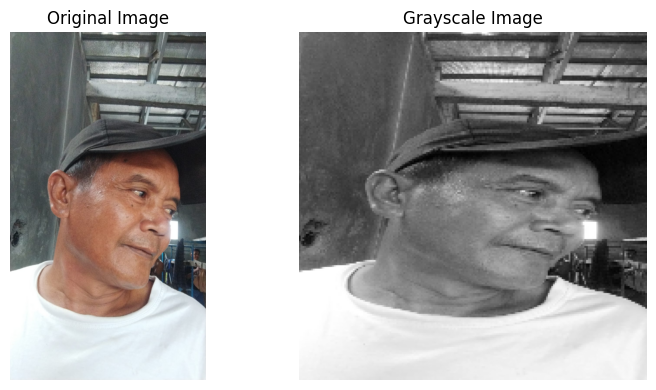

In [34]:
# Variabel untuk menyimpan gambar grayscale hasil preprocessing
preprocessed_images = []

# Preprocessing
for img_path in image_files[:3]:
    # Membaca gambar
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (200, 200))  # Resize ke 200x200
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

    # Menyimpan gambar asli dan hasil grayscale
    preprocessed_images.append((img, img_gray))

    # Menampilkan gambar asli dan hasil grayscale
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB untuk ditampilkan
    axes[0].imshow(img_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(img_gray, cmap='gray')
    axes[1].set_title("Grayscale Image")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

6. Menentukkan Haar Feature

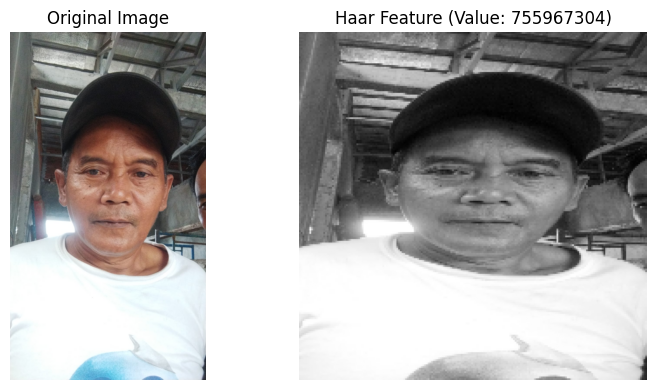

Haar Feature Value for Image 1: 755967304


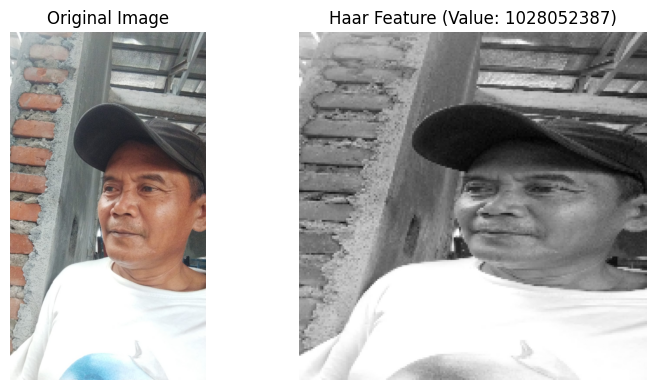

Haar Feature Value for Image 2: 1028052387


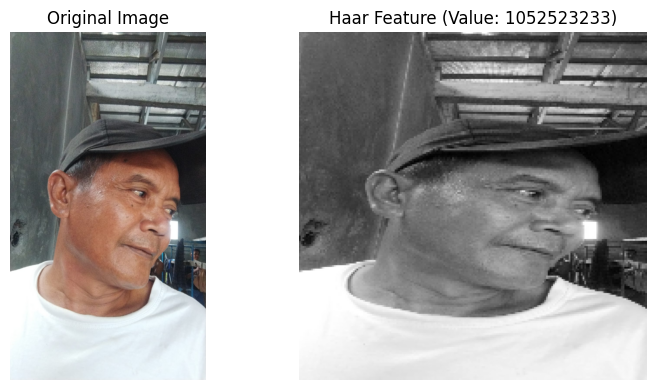

Haar Feature Value for Image 3: 1052523233


In [35]:
import numpy as np

# Fungsi untuk menghitung integral image
def integral_image(img):
    return np.cumsum(np.cumsum(img, axis=0), axis=1)

# Fungsi untuk menghitung Haar feature (kotak putih dan hitam)
def haar_feature(integral_img, x, y, width, height):
    # Kotak hitam di sebelah kiri
    black_region = integral_img[y:y+height, x:x+width//2].sum()
    # Kotak putih di sebelah kanan
    white_region = integral_img[y:y+height, x+width//2:x+width].sum()
    return white_region - black_region

# Proses perhitungan Haar Feature
for i, (img_original, img_gray) in enumerate(preprocessed_images):
    # Hitung Integral Image
    int_img = integral_image(img_gray)

    # Koordinat dan ukuran area Haar feature
    x, y, width, height = 50, 50, 100, 50  # Atur area

    # Hitung nilai Haar Feature
    feature_value = haar_feature(int_img, x, y, width, height)

    # Menampilkan gambar asli dan visualisasi hasil Haar feature
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
    axes[0].imshow(img_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(img_gray, cmap='gray')
    axes[1].set_title(f"Haar Feature (Value: {feature_value})")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

    print(f"Haar Feature Value for Image {i+1}: {feature_value}")


7. Menentukkan Integral Image

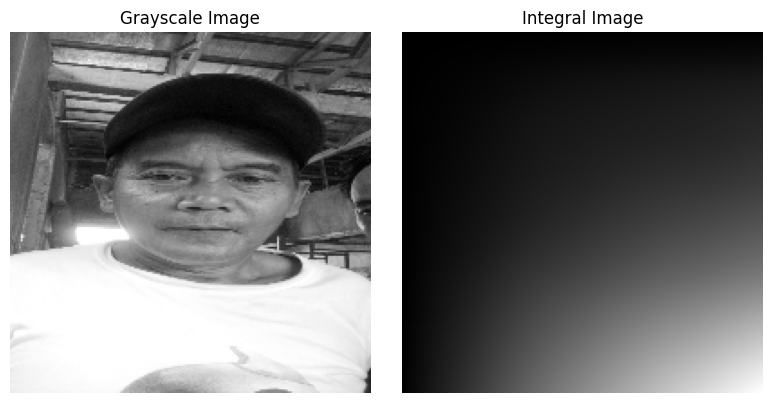

Integral Image (Partial Matrix) for Image 1:
[[  97  195  298  402  501]
 [ 201  403  605  805 1008]
 [ 305  610  914 1213 1522]
 [ 400  801 1204 1603 2020]
 [ 500 1008 1516 2014 2539]]


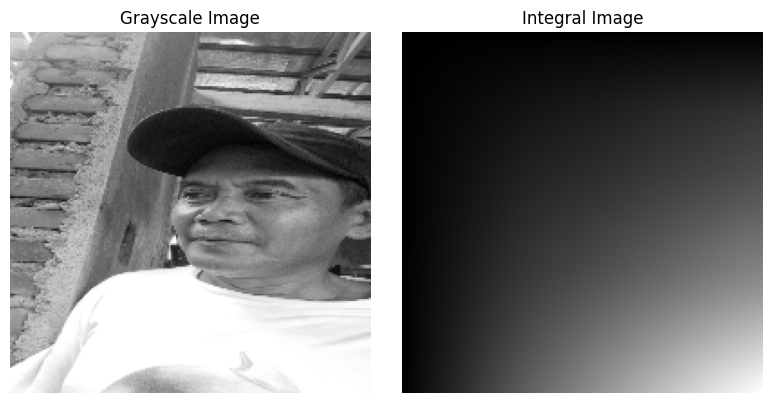

Integral Image (Partial Matrix) for Image 2:
[[ 196  393  591  789  988]
 [ 395  792 1190 1590 1991]
 [ 592 1184 1775 2367 2961]
 [ 808 1616 2428 3237 4041]
 [1031 2058 3086 4112 5132]]


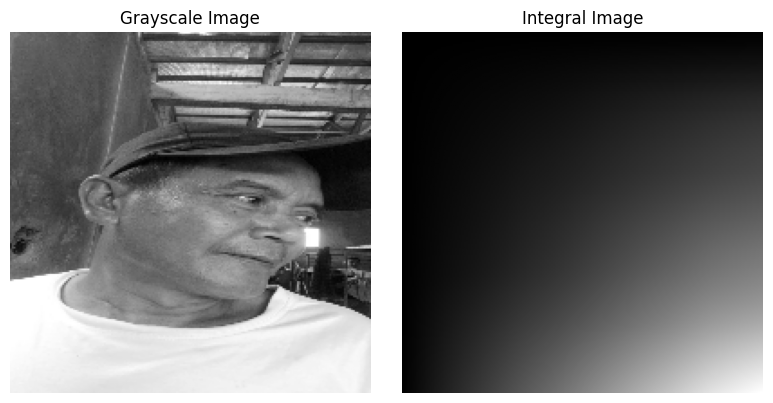

Integral Image (Partial Matrix) for Image 3:
[[ 131  261  384  514  637]
 [ 256  516  771 1036 1291]
 [ 389  774 1162 1558 1930]
 [ 515 1032 1539 2047 2527]
 [ 644 1288 1906 2524 3112]]


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung integral image
def integral_image(img):
    return np.cumsum(np.cumsum(img, axis=0), axis=1)

# Proses perhitungan integral image untuk setiap gambar grayscale
for i, (img_original, img_gray) in enumerate(preprocessed_images):
    # Hitung Integral Image
    int_img = integral_image(img_gray)

    # Menampilkan gambar grayscale dan integral image
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img_gray, cmap='gray')
    axes[0].set_title("Grayscale Image")
    axes[0].axis('off')
    axes[1].imshow(int_img, cmap='gray')
    axes[1].set_title("Integral Image")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

    # Menampilkan nilai integral sebagian kecil matriks untuk ilustrasi
    print(f"Integral Image (Partial Matrix) for Image {i+1}:")
    print(int_img[:5, :5])  # Menampilkan sebagian kecil (5x5) matriks integral


9. Menghitung Adaboost

In [37]:
import numpy as np

# Fungsi untuk menghitung integral image
def integral_image(img):
    return np.cumsum(np.cumsum(img, axis=0), axis=1)

# Fungsi untuk menghitung Haar feature (kotak putih dan hitam)
def haar_feature(integral_img, x, y, width, height):
    black_region = integral_img[y:y+height, x:x+width//2].sum()  # Kotak hitam
    white_region = integral_img[y:y+height, x+width//2:x+width].sum()  # Kotak putih
    return white_region - black_region

# Fungsi untuk membuat weak classifier
def weak_classifier(feature_value, threshold, polarity):
    """Mengembalikan prediksi (-1 atau +1) berdasarkan threshold dan polarity."""
    if polarity * feature_value < polarity * threshold:
        return 1
    else:
        return -1

# Fungsi untuk menghitung AdaBoost
def adaboost(features, labels, num_classifiers):
    """
    Implementasi sederhana AdaBoost:
    - features: Nilai fitur Haar untuk setiap gambar (N x M, N = jumlah gambar, M = jumlah fitur)
    - labels: Label untuk setiap gambar (+1 untuk wajah, -1 untuk bukan wajah)
    - num_classifiers: Jumlah weak classifiers yang akan digunakan
    """
    n_samples, n_features = features.shape
    weights = np.ones(n_samples) / n_samples  # Bobot awal, sama rata
    classifiers = []  # Simpan weak classifiers
    alpha_values = []  # Simpan bobot weak classifiers

    for _ in range(num_classifiers):
        # Normalisasi bobot
        weights /= np.sum(weights)

        # Pilih weak classifier terbaik berdasarkan error terkecil
        best_classifier = None
        best_error = float('inf')
        best_polarity = None
        best_threshold = None

        for feature_idx in range(n_features):
            feature_column = features[:, feature_idx]
            thresholds = np.unique(feature_column)  # Threshold kandidat
            for threshold in thresholds:
                for polarity in [-1, 1]:  # Dua kemungkinan polaritas
                    predictions = np.array([weak_classifier(f, threshold, polarity) for f in feature_column])
                    error = np.sum(weights * (predictions != labels))

                    if error < best_error:
                        best_error = error
                        best_classifier = feature_idx
                        best_polarity = polarity
                        best_threshold = threshold

        # Hitung bobot alpha untuk weak classifier
        alpha = 0.5 * np.log((1 - best_error) / max(best_error, 1e-10))

        # Simpan weak classifier
        classifiers.append((best_classifier, best_polarity, best_threshold))
        alpha_values.append(alpha)

        # Update bobot sampel
        feature_column = features[:, best_classifier]
        predictions = np.array([weak_classifier(f, best_threshold, best_polarity) for f in feature_column])
        weights *= np.exp(-alpha * labels * predictions)

    return classifiers, alpha_values

# Data Fitur Haar dari Gambar yang Sudah Diproses
features = []
labels = []

# Menghitung Fitur Haar untuk Setiap Gambar Grayscale
for i, (img_original, img_gray) in enumerate(preprocessed_images):
    # Hitung Integral Image
    int_img = integral_image(img_gray)

    # Contoh koordinat dan dimensi area Haar
    haar_features_for_image = []
    for x, y, width, height in [(50, 50, 100, 50), (30, 30, 60, 30), (70, 70, 80, 40)]:
        feature_value = haar_feature(int_img, x, y, width, height)
        haar_features_for_image.append(feature_value)

    features.append(haar_features_for_image)
    # Tambahkan label: +1 untuk wajah, -1 untuk bukan wajah (ganti sesuai dataset Anda)
    labels.append(1 if i % 2 == 0 else -1)  # Contoh label dummy

# Konversi ke Numpy Array
features = np.array(features)
labels = np.array(labels)

# Jalankan AdaBoost
classifiers, alpha_values = adaboost(features, labels, num_classifiers=3)

# Output Classifiers
for i, (classifier, alpha) in enumerate(zip(classifiers, alpha_values)):
    print(f"Weak Classifier {i+1}: Feature Index={classifier[0]}, Polarity={classifier[1]}, Threshold={classifier[2]}, Alpha={alpha}")


Weak Classifier 1: Feature Index=1, Polarity=1, Threshold=188842927, Alpha=11.512925464970229
Weak Classifier 2: Feature Index=1, Polarity=1, Threshold=188842927, Alpha=11.512925464970229
Weak Classifier 3: Feature Index=1, Polarity=1, Threshold=188842927, Alpha=11.512925464970229
